# Image Convolution

### What is image convolution?

Image convolution is a mathematical operation used in image processing and computer vision. It involves applying a filter to an image by sliding the filter over the image and performing a dot product between the filter and the corresponding pixel values in the image. This process is repeated for every pixel in the image, resulting in a new image with the filtered output. Convolution is used for various applications like edge detection, smoothing, sharpening, feature extraction, and is also a fundamental operation in deep learning for image classification and object recognition.

In [ ]:
#Preamble
from PIL import Image
from google.colab import drive
from IPython.display import display
from time import time
import random
import multiprocessing
from multiprocessing import Pool
import matplotlib.pyplot as plt

###Visualisation


In [ ]:
#takes a path to an image and loads it into a list (length is number of rows) of list (length is number of pixels per row) of tuples of rgb values
def load_img(path):
  image = Image.open(path)
  
  pixels = image.load()
  picture = []
  for y in range(image.height):
    picture.append([])
    for x in range(image.width):
      picture[-1].append(pixels[x, y])
  return picture

In [ ]:
def build_img(pixels):
  new_img = Image.new("RGB", (len(pixels[0]), len(pixels)))
  new_img.putdata([pixels[x][y] for x in range(len(pixels[0])) for y in range(len(pixels))])
  ratio = len(pixels[0])//len(pixels)
  resized_img = new_img.resize((800, 800*ratio))
  display(resized_img)

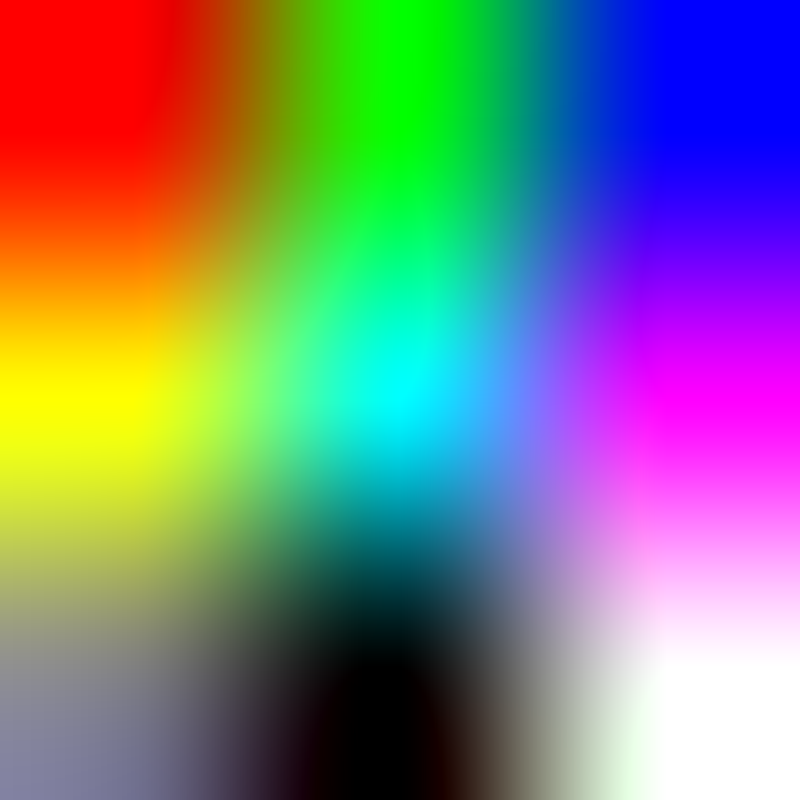

In [ ]:
pixels = [[(255, 0, 0), (0, 255, 0), (0, 0, 255)],
        [(255, 255, 0), (0, 255, 255), (255, 0, 255)],
        [(128, 128, 128), (0, 0, 0), (255, 255, 255)]]
        
build_img(pixels)

###Sequential Implementation
So we have two functions: The first function convolve_pixel takes an image, a coordinate pair, and a kernel matrix as inputs, and performs image convolution at the given coordinate using the kernel matrix The second function convolve_img takes in an image, a kernel and applies the convolve_pixel function to every pixel within the specified image size one by one. The resulting filtered output is returned as a new image.

In [ ]:
def convolve_pixel(img,coords,kernel):
  x,y = coords
  ker_h,ker_w = len(kernel),len(kernel[0])
  img_h,img_w = len(img),len(img[0])

  left = max(0, x - ker_w//2) #choosing by min and max for pixel on edge cases 
  right = min(img_w-1, x + ker_w//2)
  top = max(0, y - ker_h//2)
  bottom = min(img_h-1, y + ker_h//2)

  if ker_w % 2 == 0: #in case the image dimensions are even
    right -= 1
  if ker_h % 2 == 0:
    bottom -= 1
  lst = []
  result = 0
  for rgb in range(3): #convolving on each rgb value separately
    for i in range(top, bottom + 1):
        for j in range(left, right + 1):
            ker_x = j - x + ker_w//2
            ker_y = i - y + ker_h//2
            result += img[i][j][rgb]* kernel[ker_y][ker_x]
    lst.append(max(0,min(255,round(result))))
  tup = tuple(lst)
  return tup

In [ ]:
def convolve_img(new_img, old_img, cords, size, kernel,num_processes):
  x,y = cords
  w, l = size
  for i in range(y, y+l):
    for j in range(x, x+w):
        new_img[i][j] = convolve_pixel(old_img, (i, j), kernel)
  return new_img

In [ ]:
image = [[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for j in range(25)] for i in range(25)] 
new_image = [[0 for j in range(25)] for i in range(25)]

In [ ]:
kernel = [[random.randint(0,15)/100 for j in range(3)] for i in range(3)]

GB_kernel = [[0,1/16,0],[1/16,4/16,1/16],[0,1/16,0]] #Gaussian blur
SI_kernel = [[0,-1,0],[-1,5,-1],[0,-1,0]] #Sharpen Image
IS_kernel = [[-1,-1,-1],[-1,9,-1],[-1,-1,-1]] #Intensified Sharpening
Id_kernel = [[1,0,0],[0,1,0],[0,0,1]] #Identity
print(image,kernel)

[[(87, 211, 151), (58, 64, 155), (218, 53, 5), (46, 114, 162), (143, 63, 208), (80, 45, 214), (198, 90, 81), (114, 220, 198), (59, 73, 237), (4, 253, 26), (104, 79, 229), (16, 62, 225), (207, 194, 7), (178, 105, 21), (231, 60, 107), (253, 120, 164), (46, 195, 247), (220, 235, 133), (52, 75, 98), (171, 15, 132), (74, 243, 2), (177, 166, 160), (174, 103, 72), (76, 38, 54), (126, 118, 237)], [(120, 138, 175), (78, 255, 222), (159, 216, 101), (66, 65, 19), (213, 217, 146), (238, 58, 177), (247, 37, 86), (204, 10, 144), (156, 98, 55), (213, 96, 250), (106, 139, 5), (233, 93, 76), (191, 85, 82), (184, 31, 146), (149, 55, 131), (160, 218, 117), (91, 27, 96), (84, 159, 220), (131, 83, 203), (17, 63, 9), (182, 242, 4), (124, 158, 159), (100, 231, 16), (144, 222, 207), (125, 200, 73)], [(132, 188, 125), (128, 185, 203), (18, 227, 212), (192, 184, 173), (41, 209, 251), (217, 202, 184), (81, 223, 190), (164, 95, 65), (71, 101, 109), (39, 244, 39), (38, 76, 129), (102, 97, 121), (49, 240, 48), (58,

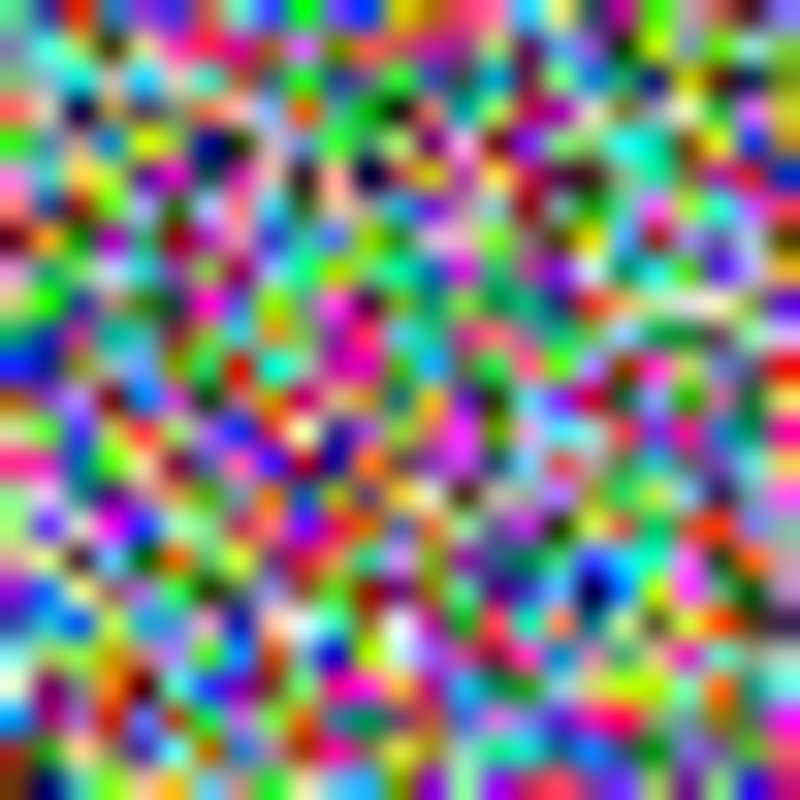

In [ ]:
build_img(image)

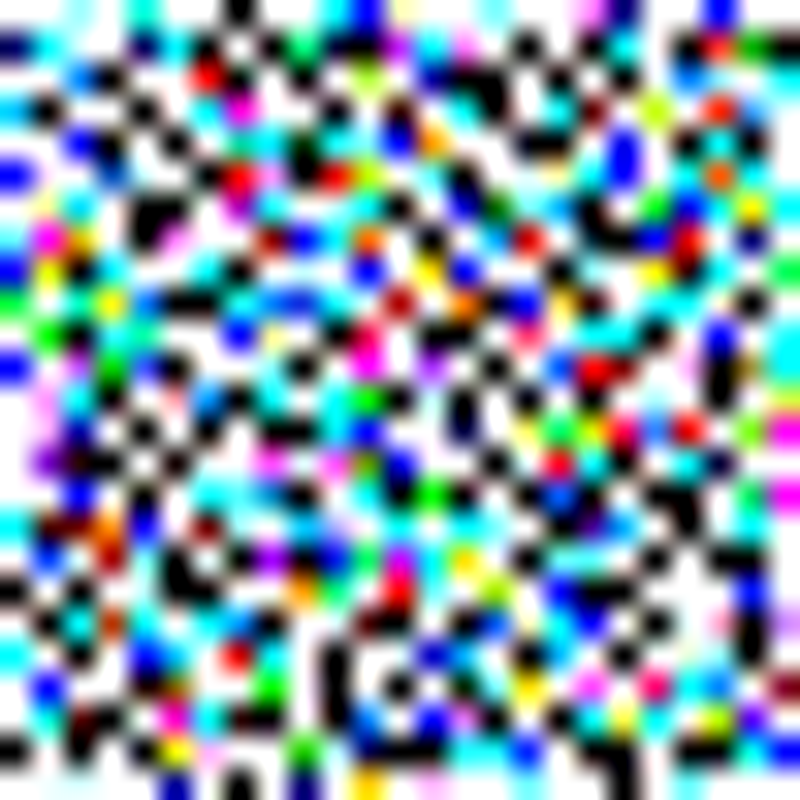

[[(255, 255, 255), (255, 255, 255), (163, 255, 255), (255, 255, 255), (0, 255, 218), (255, 255, 255), (255, 255, 255), (0, 0, 0), (255, 255, 255), (255, 255, 255), (0, 255, 255), (0, 0, 255), (255, 255, 191), (255, 255, 255), (255, 255, 255), (131, 255, 255), (255, 255, 255), (255, 255, 255), (255, 124, 255), (0, 0, 127), (250, 255, 255), (255, 255, 255), (0, 0, 255), (255, 255, 255), (255, 255, 255)], [(0, 0, 105), (0, 255, 255), (211, 255, 255), (255, 255, 255), (0, 0, 92), (0, 247, 255), (0, 0, 0), (255, 255, 255), (0, 0, 0), (0, 255, 132), (0, 0, 52), (0, 0, 0), (190, 33, 255), (0, 255, 255), (255, 122, 255), (255, 255, 255), (0, 0, 0), (255, 255, 255), (0, 0, 0), (0, 255, 255), (255, 255, 255), (0, 0, 0), (255, 56, 46), (0, 177, 0), (0, 0, 0)], [(255, 255, 255), (255, 255, 255), (0, 134, 255), (0, 0, 0), (255, 255, 255), (255, 255, 255), (255, 0, 0), (0, 0, 0), (255, 255, 255), (0, 0, 0), (255, 255, 255), (180, 255, 61), (255, 255, 255), (0, 0, 162), (0, 0, 0), (0, 0, 0), (255, 25

In [ ]:
build_img(convolve_img(new_image,image,(0,0),(25,25),SI_kernel,1))
print(new_image)

#general call for this function
# convolve_img(new_image,image,(x,y),(len(new_image)-x,len(new_image[0]-y)),kernel)

###Parallel Implementation
In parallel, we divide the input image into multiple sub-images which are convolved with a given kernel matrix using the process_sub_image function. The parr_convolve_img function then combines the filtered sub-images to produce the final filtered output image. This approach improves the performance of image convolution on large images.


In [ ]:
def process_sub_image(old_img, sub_img, kernel):
  sub_x, sub_y, sub_w, sub_l = sub_img

  sub_conv_img = [[(0,0,0) for _ in range(sub_w)] for _ in range(sub_l)]#creating a kind of empty list for the convolved image to replace the values later

  for i in range(sub_y, sub_y+sub_l): 
    for j in range(sub_x, sub_x+sub_w):
      sub_conv_img[i-sub_y][j-sub_x] = convolve_pixel(old_img, (i, j), kernel) #convolving over each pixel
  
  return sub_img, sub_conv_img

In [ ]:
from multiprocessing import Pool
def parr_convolve_img(new_img, old_img, cords, size, kernel, num_processes):
  x,y = cords
  w,l = size
  width = w // num_processes # calculate the width of each sub-image

  sub_images = []

  for i in range(num_processes):
    sub_x = x + i*width  # calculate the starting x coordinate of the sub-image
    if i < num_processes-1:
      sub_w = width 
    else:
      sub_w = w - i*width  # calculate the width of the sub-image
    sub_images.append((sub_x, y, sub_w, l))  # store the coordinates and size of each sub-image in a list

  with Pool(num_processes) as pool:
    results = []
    for sub_img in sub_images:
      result = pool.apply_async(process_sub_image, (old_img, sub_img, kernel))  # create a new process for each sub-image
      results.append(result)

    for i, result in enumerate(results):
      sub_img, sub_conv_img = result.get() 
      sub_x, sub_y, sub_w, sub_l = sub_img #get the convolved sub-image along with its coordinates

      for j in range(sub_l):
        for k in range(sub_w):
          new_img[sub_y+j][sub_x+k] = sub_conv_img[j][k]  # copy the convolved sub-image back into the main image
          
  return new_img

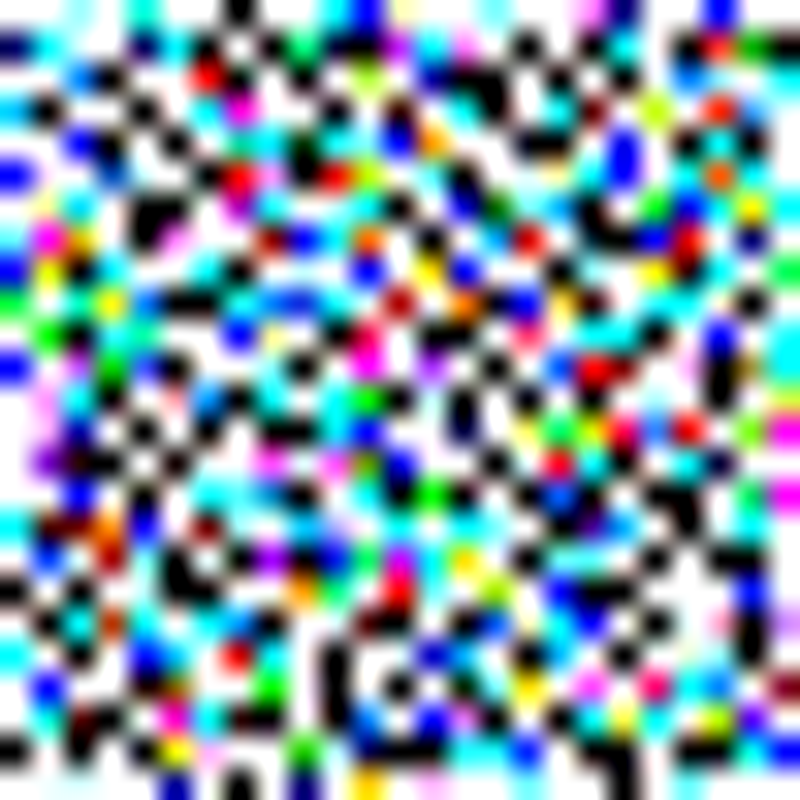

In [ ]:
build_img(parr_convolve_img(new_image,image,(0,0),(25,25),SI_kernel,4))

### Algorithm Analysis

#### Algorithm Validity

In [ ]:
convolve_img(new_image,image,(0,0),(25,25),SI_kernel,1) == parr_convolve_img(new_image,image,(0,0),(25,25),SI_kernel,4)

True

#### Time Analysis

##### Effect of Image Size on Time of Execution

In [ ]:
#find average time over a given number of runs of convolving the image of using the given convolution function.
def calculateConvolveTime(func,new_image,cords,size,kernel,num_processes,runs):
  totalTime = 0 #store total time across all runs

  for run in range(runs):
    image = [[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for j in range(size[0])] for i in range(size[0])]
    start_time = time()
    func(new_image,image,cords,size,kernel,num_processes)
    end_time = time()
    
    print("run", run+1, "of size", size, "finished")
    totalTime += end_time - start_time #add the time taken to run the given convolve function

  return totalTime/runs #return average time

In [ ]:
def analyse():
  sizes = [5,25,100,400,600, 800, 1000] #the different list sizes

  sic_times = [] #to store the avg time taken for the different lists for Sequential Image Convolution
  pic_times = [] #to store the avg time taken for the different lists for Parallel Image Convolution

  runs = 5 #number of runs the time is averaged over
  kernel = [[random.randint(0,13)/100 for j in range(3)] for i in range(3)] #kernel of size 3

  for size in sizes:
    # image = [[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for j in range(size)] for i in range(size)]
    new_image = [[0 for j in range(size)] for i in range(size)]
    sic_times.append(calculateConvolveTime(convolve_img,new_image,(0,0),(size,size),kernel,2,runs))
    pic_times.append(calculateConvolveTime(parr_convolve_img,new_image,(0,0),(size,size),kernel,2,runs))

  print("Sequential Image Convolution times: ", sic_times)
  print("Parallel Image Convolution times: ", pic_times)
  sizes2 = [size**2 for size in sizes]

  #plot graph of time against number of items
  plt.plot(sizes2, sic_times, label="Sequential Image Convolution")
  plt.plot(sizes2, pic_times, label="Parallel Image Convolution")

  plt.legend(loc="upper left")
  plt.xlabel('Image Size (Number of Pixels)')
  plt.ylabel('Average Convolution Time')
  plt.show()

run 1 of size (5, 5) finished
run 2 of size (5, 5) finished
run 3 of size (5, 5) finished
run 4 of size (5, 5) finished
run 5 of size (5, 5) finished
run 1 of size (5, 5) finished
run 2 of size (5, 5) finished
run 3 of size (5, 5) finished
run 4 of size (5, 5) finished
run 5 of size (5, 5) finished
run 1 of size (25, 25) finished
run 2 of size (25, 25) finished
run 3 of size (25, 25) finished
run 4 of size (25, 25) finished
run 5 of size (25, 25) finished
run 1 of size (25, 25) finished
run 2 of size (25, 25) finished
run 3 of size (25, 25) finished
run 4 of size (25, 25) finished
run 5 of size (25, 25) finished
run 1 of size (100, 100) finished
run 2 of size (100, 100) finished
run 3 of size (100, 100) finished
run 4 of size (100, 100) finished
run 5 of size (100, 100) finished
run 1 of size (100, 100) finished
run 2 of size (100, 100) finished
run 3 of size (100, 100) finished
run 4 of size (100, 100) finished
run 5 of size (100, 100) finished
run 1 of size (400, 400) finished
run 2 

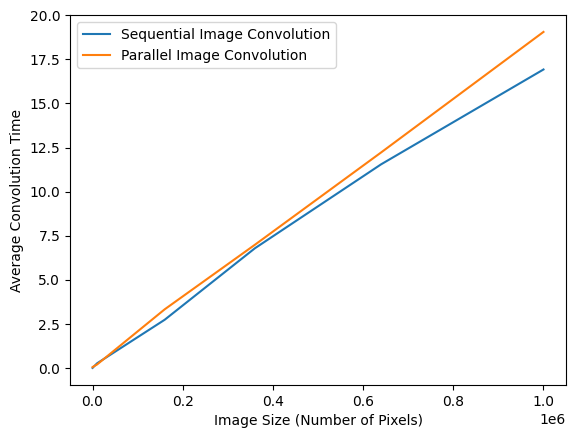

In [ ]:
if __name__ == '__main__':
    multiprocessing.freeze_support()
    analyse()

On Local Machine

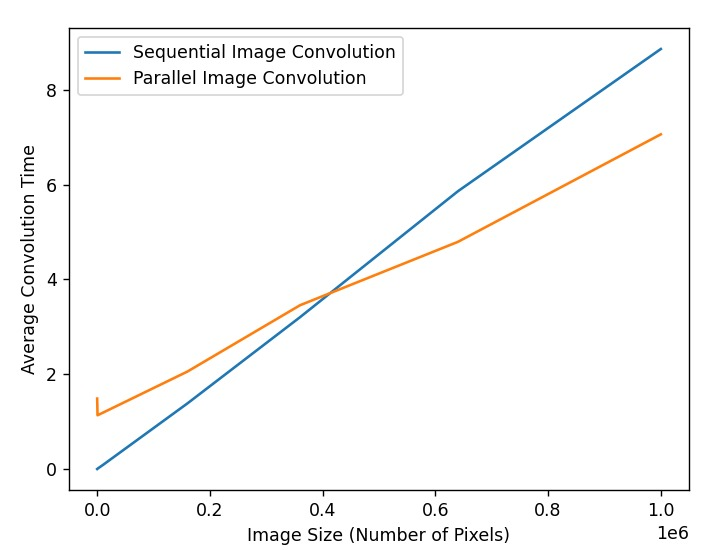

#### Result
As the size of the data increases, the parallel algorithm performs better than the sequential one. Moreover, the general shape of the graph seems to be similar. This shows that a parallel algorithm has a similar time complexity but a smaller coefficient which is what we expected. The longer time of execution for smaller inputs indicates that creating a new process has a significant overhead which becomes worthwhile for larger data chunks.

##### Effect of Kernel Size on Time of Execution

run 1 of size (75, 75) finished
run 2 of size (75, 75) finished
run 3 of size (75, 75) finished
run 4 of size (75, 75) finished
run 5 of size (75, 75) finished
run 1 of size (75, 75) finished
run 2 of size (75, 75) finished
run 3 of size (75, 75) finished
run 4 of size (75, 75) finished
run 5 of size (75, 75) finished
run 1 of size (75, 75) finished
run 2 of size (75, 75) finished
run 3 of size (75, 75) finished
run 4 of size (75, 75) finished
run 5 of size (75, 75) finished
run 1 of size (75, 75) finished
run 2 of size (75, 75) finished
run 3 of size (75, 75) finished
run 4 of size (75, 75) finished
run 5 of size (75, 75) finished
run 1 of size (75, 75) finished
run 2 of size (75, 75) finished
run 3 of size (75, 75) finished
run 4 of size (75, 75) finished
run 5 of size (75, 75) finished
run 1 of size (75, 75) finished
run 2 of size (75, 75) finished
run 3 of size (75, 75) finished
run 4 of size (75, 75) finished
run 5 of size (75, 75) finished
run 1 of size (75, 75) finished
run 2 of

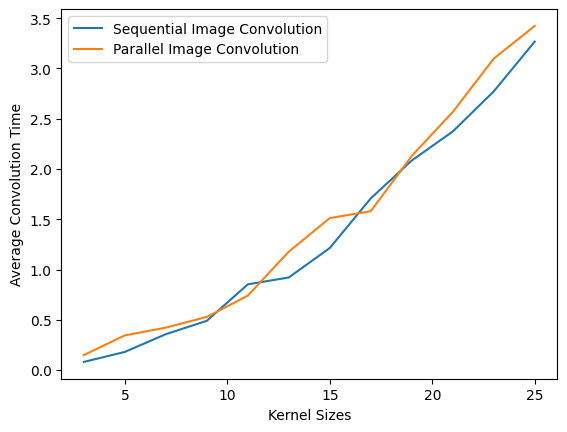

In [ ]:
sizes = [i for i in range(3,26,2)] #the different list sizes
sic_times = [] #to store the avg time taken for the different lists for Sequential Image Convolution
pic_times = [] #to store the avg time taken for the different lists for Parallel Image Convolution

runs = 5  #number of runs the time is averaged over
cords = (0,0)
image = [[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for j in range(75)] for i in range(75)]
new_image = [[0 for j in range(len(image))] for i in range(len(image))]
size = len(image)

for area in sizes:
  kernel = [[random.randint(0,50)/100 for j in range(area)] for i in range(area)] 
  sic_times.append(calculateConvolveTime(convolve_img,new_image,cords,(size,size),kernel,2,runs))
  pic_times.append(calculateConvolveTime(parr_convolve_img,new_image,cords,(size,size),kernel,2,runs))

print("Sequential Image Convolution times: ", sic_times)
print("Parallel Image Convolution times: ", pic_times)

#plot graph of time against number of items
plt.plot(sizes, sic_times, label="Sequential Image Convolution")
plt.plot(sizes, pic_times, label="Parallel Image Convolution")

plt.legend(loc="upper left")
plt.xlabel('Kernel Sizes')
plt.ylabel('Average Convolution Time')
plt.show()

Analysis on Local Machine:

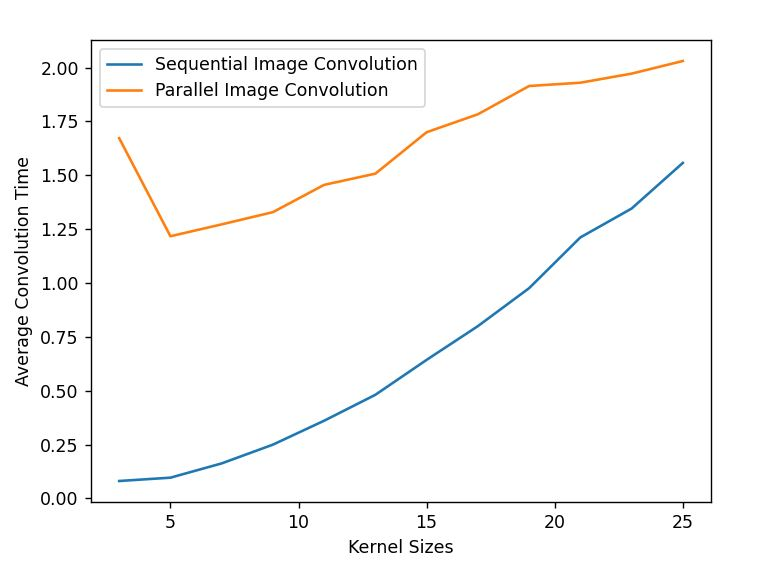

#### Result
The graph for parallel execution seems to have a smaller gradient suggesting that it becomes worthwhile as the kernel size increases. This is in line with our expectation that as the tasks become more computationally intensive, the benefit of parallelisation becomes greater than the overhead cost of creating parallel processes.